# CNN on MINST dataset

## Objective
try 3 different conv 3*3 5*5 2*2 kerneals

M1: try 3 conv layer,M2: 5 cond net M3: 7 conv layers

try dropout in some layers

try different maxpool, batch normalization 

This is done in google colab

## Import library

In [2]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
%matplotlib inline

Using TensorFlow backend.


In [3]:
batch_size = 128
num_classes = 10
epochs = 50

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#x_train=x_train[0:500]
#y_train=y_train[0:500]
#x_test=x_test[501:600]
#y_test=y_test[501:600]


11493376/11490434 [==============================] - 2s 0us/step


## Preprocessing

In [4]:
# input image dimensions
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## 3 layer convolution

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 64)          16448     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
__________

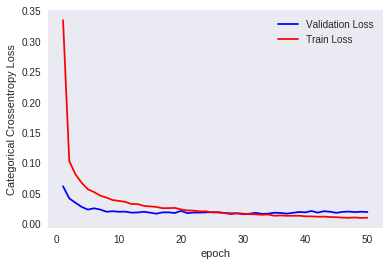

In [5]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py
#28*28*1 ===5*5*1 32 conv ===> 24*24*32 ==3*3 64 conv ==> 22*22*64 ==3*3 32 maxpool==>27*27 32
#==2*2 64 conv ==> 26*26*64 ==2*2 maxpool ==>25*25 64

model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())#25*25*64
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

import pandas as pd
import matplotlib.pyplot as plt
scoretrain = model.evaluate(x_train, y_train, verbose=0) 
aa=pd.DataFrame()
bb=pd.DataFrame({'type':['3 conv'],'Test Score':[score[0]],'Test Accuracy':[score[1]], \
                   'Train Score':[scoretrain[0]],'Train Accuracy':[scoretrain[1]]})
aa=aa.append(bb)

#history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))


fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## 5 Layer Convolution

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), data_format="channels_last")`
  if __name__ == '__main__':


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 20, 20, 64)        51264     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 15, 15, 128)       131200    
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        73792     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 64)          36928     
__________

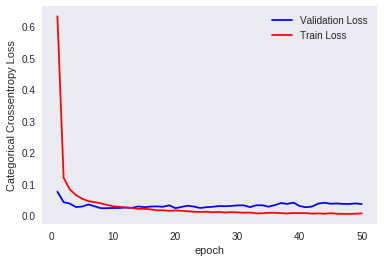

In [6]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py
#28*28*1 ===5*5*1 32 conv ===> 24*24*32 ==5*5 64 conv ==> 20*20*64 ==3*3 32 maxpool==>18*18 32
#=4*4  128 conv ==> 15*15 128 ==3*3 64 conv ==> 13*13 64 ==2*2 64 maxpool ==>11*11 64 
#= 3*3 64 conv ==>9*9 64 ==2*2 64==>8*8 64

model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3),strides=1))
model.add(Conv2D(128, (4, 4), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
#odel.add(ZeroPadding2D((1, 1), input_shape=(img_rows, img_cols, channel)))
model.add(MaxPooling2D(pool_size=(2, 2),dim_ordering="tf"))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(4,4)))

model.add(Dropout(0.25))
model.add(Flatten())#25*25*64
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())



model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

import pandas as pd
import matplotlib.pyplot as plt
scoretrain = model.evaluate(x_train, y_train, verbose=0) 
bb=pd.DataFrame({'type':['5 conv'],'Test Score':[score[0]],'Test Accuracy':[score[1]], \
                   'Train Score':[scoretrain[0]],'Train Accuracy':[scoretrain[1]]})
aa=aa.append(bb)

#history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))


fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# 7Layer Conv

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), data_format="channels_last")`
  if sys.path[0] == '':


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 25, 25, 128)       2176      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 23, 23, 64)        73792     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 21, 21, 32)        18464     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 19, 19, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 18, 18, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 15, 15, 128)       65664     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 13, 13, 64)        73792     
__________

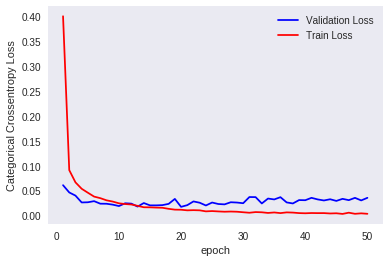

In [7]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

model = Sequential()
model.add(Conv2D(128, kernel_size=(4, 4),strides=1,activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=1))
model.add(Conv2D(128, (4, 4), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (2, 3), activation='relu'))
#odel.add(ZeroPadding2D((1, 1), input_shape=(img_rows, img_cols, channel)))
model.add(MaxPooling2D(pool_size=(2, 2),dim_ordering="tf"))

model.add(Dropout(0.25))
model.add(Flatten())#25*25*64
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())



model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

import pandas as pd
import matplotlib.pyplot as plt
scoretrain = model.evaluate(x_train, y_train, verbose=0) 
bb=pd.DataFrame({'type':['7 conv'],'Test Score':[score[0]],'Test Accuracy':[score[1]], \
                   'Train Score':[scoretrain[0]],'Train Accuracy':[scoretrain[1]]})
aa=aa.append(bb)

#history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))


fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [0]:
# Compare 

## Compare different model
It seems for 3 layer conv net 30 epoch is best, for 5 layer cond net 12 epoch are best and for 5 layer conv net 12 epoch are best, because there cv+train error are equal.
Below are the differnent matric for models

In [9]:
aa

,Test Accuracy,Test Score,Train Accuracy,Train Score,type
0,0.9949,0.019191,0.999667,0.001329,3 conv
0,0.9946,0.036135,0.999533,0.001360,5 conv
0,0.9949,0.035568,0.999817,0.000580,7 conv
